In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
boston = datasets.load_boston()

In [3]:
X = boston.data
y = boston.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [4]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [12]:
FILE_PATH = './data'
FILE_NAME = 'log.txt'

if(os.path.exists(os.path.join(FILE_PATH, FILE_NAME))):
    os.remove(os.path.join(FILE_PATH, FILE_NAME))

def write_log(message):
    if not os.path.exists(FILE_PATH):
        os.mkdir(FILE_PATH)
    file = os.path.join(FILE_PATH, FILE_NAME)
    
    with open(file, 'a+') as f:
        f.write(message+"\n")

        
def write_result(key, cv_result):
    write_log( '%10s:\tMean: %.3f\tMin: %.3f\t(std:  %.3f)'%(key, cv_result.mean(), cv_result.min(), cv_result.std()) )

In [13]:
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'

models = {}
models['LR'] = LinearRegression()
models['Ridge'] = Ridge()  # 岭回归
models['LASSO'] = Lasso()   # Lasso 回归
models['ENet'] = ElasticNet()  # 弹性网络
models['KNN'] = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

LR: -24.507288 (9.946044)
Ridge: -24.605906 (10.384284)
LASSO: -29.385505 (11.917297)
ENet: -28.600377 (11.485086)
KNN: -39.527182 (18.388417)
CART: -19.018084 (9.607249)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-

SVM: -82.834043 (35.913568)


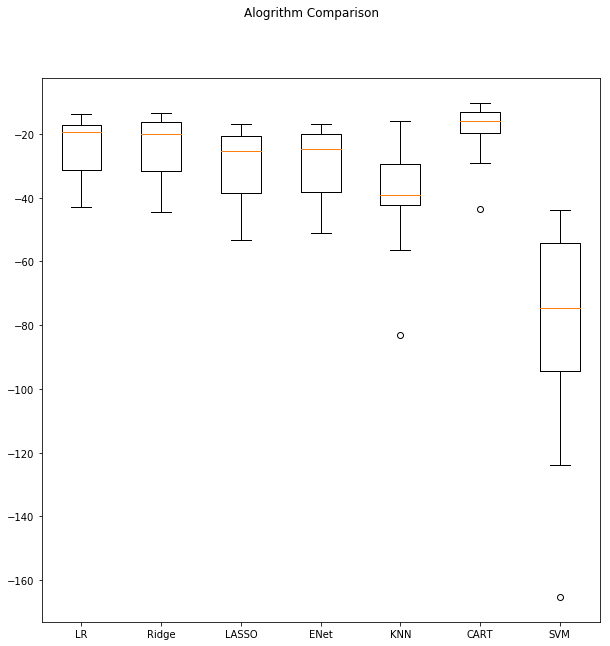

In [14]:
results = []
write_log("---------- models ---------------")
for key in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], 
                               X_train, 
                               y_train,
                               cv=kfold,
                               scoring=scoring)
    results.append(cv_result)
    print( '%s: %f (%f)'%(key, cv_result.mean(), cv_result.std()) )
    write_result(key, cv_result)
fig = plt.figure(figsize=(10,10))
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())

plt.show()

箱形图说明参考：https://blog.csdn.net/weixin_40683253/article/details/87857194

In [15]:
pipelines= {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerRidge'] = Pipeline([('Scaler', StandardScaler()), ('Ridge', Ridge())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerENet'] = Pipeline([('Scaler', StandardScaler()), ('ENET', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVR())])

In [16]:
results = []
write_log("---------- pipelines ---------------")
for key in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], 
                               X_train, 
                               y_train,
                               cv=kfold,
                               scoring=scoring)
    results.append(cv_result)
    print( '%s: %f (%f)'%(key, cv_result.mean(), cv_result.std()) )
    write_result(key, cv_result)

ScalerLR: -24.507288 (9.946044)
ScalerRidge: -24.489410 (10.032664)
ScalerLASSO: -30.476810 (15.845905)
ScalerENet: -31.884813 (17.871897)
ScalerKNN: -23.257802 (12.626106)
ScalerCART: -17.389050 (9.184278)
ScalerSVM: -33.264879 (21.823647)


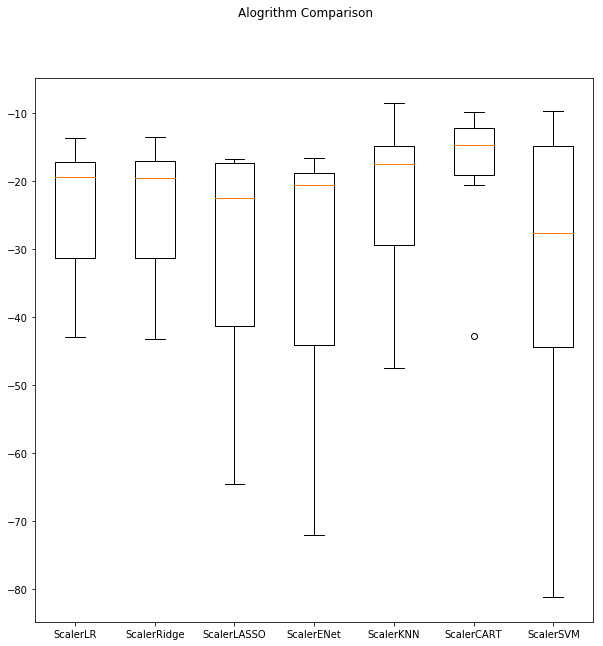

In [17]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(pipelines.keys())
plt.show()

In [21]:
ensembles= {}
ensembles['ScalerAB'] = Pipeline([('Scaler', StandardScaler()), ('LR', AdaBoostRegressor())])
ensembles['ScalerAB-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN', AdaBoostRegressor(base_estimator=KNeighborsRegressor()))])
ensembles['ScalerAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostRegressor(base_estimator=LinearRegression()))])
ensembles['ScalerRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScalerETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScalerGBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])

ScalerAB:	 mean: -13.462283 , min: -25.788133,  (std 4.525589)
ScalerAB-KNN:	 mean: -18.501606 , min: -48.977032,  (std 12.995352)
ScalerAB-LR:	 mean: -26.607054 , min: -38.353191,  (std 6.303903)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

ScalerRFR:	 mean: -12.834763 , min: -31.937087,  (std 7.862536)
ScalerETR:	 mean: -10.473256 , min: -22.470458,  (std 4.930020)
ScalerGBR:	 mean: -9.128123 , min: -19.050936,  (std 4.372316)


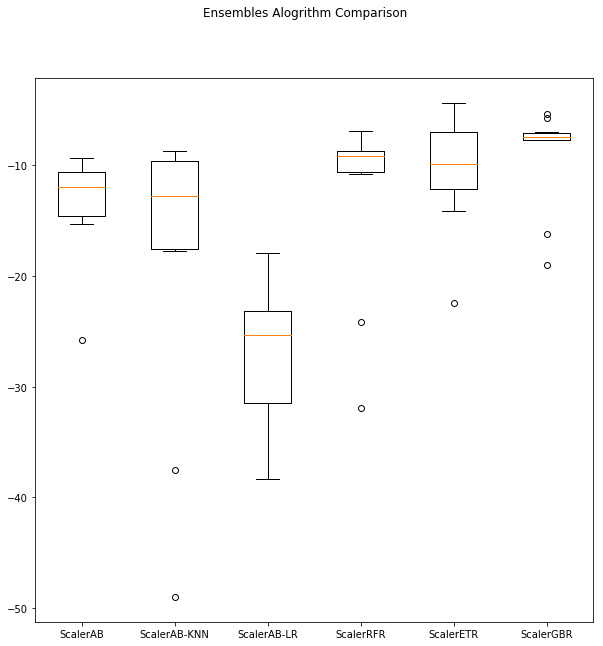

In [22]:
results = []
write_log("---------- ensembles ---------------")
for key in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], 
                               X_train, 
                               y_train,
                               cv=kfold,
                               scoring=scoring)
    results.append(cv_result)
    write_result(key, cv_result)
    print( '%s:\t mean: %f , min: %f,  (std %f)'%(key, cv_result.mean(), cv_result.min(), cv_result.std()) )

fig = plt.figure(figsize=(10,10))
fig.suptitle('Ensembles Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()